Dhruv Gandhi and Aayush Dhiman

In [1]:
# https://forums.trakt.tv/t/id-like-an-honest-opinion-which-rating-system-you-trust/1779/2

In [2]:
# /search/trakt/:id?id_type=movie

In [1]:
import src.obtain_data
import src.collaborative_filtering

In [4]:
# src.obtain_data.main(15)

In [2]:
rating=4
trakt_id=24402
user_entry = src.obtain_data.create_user_entry(rating, trakt_id)

In [3]:
user_entry[24402].value_counts()

24402
4.0    1
Name: count, dtype: int64

In [4]:
non_na_counts = user_entry.notna().sum(axis=1)
row_with_most_non_na = non_na_counts.idxmax()
row_with_most_non_na

item_cosine_unscaled_rmse, item_euclidean_unscaled_rmse, user_cosine_unscaled_rmse, user_euclidean_unscaled_rmse, item_cosine_scaled_rmse, item_euclidean_scaled_rmse, user_cosine_scaled_rmse, user_euclidean_scaled_rmse = (None,)*8
item_cosine_unscaled_mae, item_euclidean_unscaled_mae, user_cosine_unscaled_mae, user_euclidean_unscaled_mae, item_cosine_scaled_mae, item_euclidean_scaled_mae, user_cosine_scaled_mae, user_euclidean_scaled_mae = (None,)*8
item_cosine_unscaled_time, item_euclidean_unscaled_time, user_cosine_unscaled_time, user_euclidean_unscaled_time, item_cosine_scaled_time, item_euclidean_scaled_time, user_cosine_scaled_time, user_euclidean_scaled_time = (None,)*8
item_cosine_unscaled_memory, item_euclidean_unscaled_memory, user_cosine_unscaled_memory, user_euclidean_unscaled_memory, item_cosine_scaled_memory, item_euclidean_scaled_memory, user_cosine_scaled_memory, user_euclidean_scaled_memory = (None,)*8

In [5]:
import time

In [6]:
import psutil
def measure_memory():
    """Measure current memory usage in MB."""
    process = psutil.Process()
    mem_info = process.memory_info()
    return mem_info.rss / (1024 * 1024)

In [7]:
try:
    start_time = time.time()
    start_memory = measure_memory()
    item_cosine_unscaled_rmse, item_cosine_unscaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='cosine', method='item', scale=False)
    item_cosine_unscaled_time = time.time() - start_time
    item_cosine_unscaled_memory = measure_memory() - start_memory
except Exception as e:
    print(f"Error in item_cosine_unscaled: {e}")
    pass
try:
    start_time = time.time()
    start_memory = measure_memory()
    item_euclidean_unscaled_rmse, item_euclidean_unscaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='euclidean', method='item', scale=False)
    item_euclidean_unscaled_time = time.time() - start_time
    item_euclidean_unscaled_memory = measure_memory() - start_memory
except:
    pass

print(f"Item-based Cosine Unscaled RMSE: {item_cosine_unscaled_rmse}")
print(f"Item-based Cosine Unscaled MAE: {item_cosine_unscaled_mae}")
print(f"Item-based Euclidean Unscaled RMSE: {item_euclidean_unscaled_rmse}")
print(f"Item-based Euclidean Unscaled MAE: {item_euclidean_unscaled_mae}")

Predicted ratings for PaleBluDot, method=item, k=5, distance=cosine, scale=False
RMSE: 0.9127577026527655, MAE: 0.5716011295390633
Predicted ratings for PaleBluDot, method=item, k=5, distance=euclidean, scale=False
RMSE: 0.8763260514649304, MAE: 0.5431871989496729
Item-based Cosine Unscaled RMSE: 0.9127577026527655
Item-based Cosine Unscaled MAE: 0.5716011295390633
Item-based Euclidean Unscaled RMSE: 0.8763260514649304
Item-based Euclidean Unscaled MAE: 0.5431871989496729


In [8]:
try:
    start_time = time.time()
    start_memory = measure_memory()
    user_cosine_unscaled_rmse, user_cosine_unscaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='cosine', method='user', scale=False)
    user_cosine_unscaled_time = time.time() - start_time
    user_cosine_unscaled_memory = measure_memory() - start_memory
except:
    pass
try:
    start_time = time.time()
    start_memory = measure_memory()
    user_euclidean_unscaled_rmse, user_euclidean_unscaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='euclidean', method='user', scale=False)
    user_euclidean_unscaled_time = time.time() - start_time
    user_euclidean_unscaled_memory = measure_memory() - start_memory
except:
    pass


print(f"User-based Cosine Unscaled RMSE: {user_cosine_unscaled_rmse}")
print(f"User-based Cosine Unscaled MAE: {user_cosine_unscaled_mae}")
print(f"User-based Euclidean Unscaled RMSE: {user_euclidean_unscaled_rmse}")
print(f"User-based Euclidean Unscaled MAE: {user_euclidean_unscaled_mae}")

Predicted ratings for PaleBluDot, method=user, k=5, distance=cosine, scale=False
RMSE: 1.3620749564929515, MAE: 0.8757262673743725
Predicted ratings for PaleBluDot, method=user, k=5, distance=euclidean, scale=False
RMSE: 1.3652364673931972, MAE: 0.9028209855649639
User-based Cosine Unscaled RMSE: 1.3620749564929515
User-based Cosine Unscaled MAE: 0.8757262673743725
User-based Euclidean Unscaled RMSE: 1.3652364673931972
User-based Euclidean Unscaled MAE: 0.9028209855649639


In [9]:
try:
    start_time = time.time()
    start_memory = measure_memory()
    item_cosine_scaled_rmse, item_cosine_scaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='cosine', method='item', scale=True)
    item_cosine_scaled_time = time.time() - start_time
    item_cosine_scaled_memory = measure_memory() - start_memory
except:
    pass
try:
    start_time = time.time()
    start_memory = measure_memory()
    item_euclidean_scaled_rmse, item_euclidean_scaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='euclidean', method='item', scale=True)
    item_euclidean_scaled_time = time.time() - start_time
    item_euclidean_scaled_memory = measure_memory() - start_memory
except:
    pass

print(f"Item-based Cosine Scaled RMSE: {item_cosine_scaled_rmse}")
print(f"Item-based Cosine Scaled MAE: {item_cosine_scaled_mae}")
print(f"Item-based Euclidean Scaled RMSE: {item_euclidean_scaled_rmse}")
print(f"Item-based Euclidean Scaled MAE: {item_euclidean_scaled_mae}")

Predicted ratings for PaleBluDot, method=item, k=5, distance=cosine, scale=True
RMSE: 0.9143613581909171, MAE: 0.5707509216736755
Predicted ratings for PaleBluDot, method=item, k=5, distance=euclidean, scale=True
RMSE: 1.1249418578538362, MAE: 0.7633843601490756
Item-based Cosine Scaled RMSE: 0.9143613581909171
Item-based Cosine Scaled MAE: 0.5707509216736755
Item-based Euclidean Scaled RMSE: 1.1249418578538362
Item-based Euclidean Scaled MAE: 0.7633843601490756


In [10]:
try:
    start_time = time.time()
    start_memory = measure_memory()
    user_cosine_scaled_rmse, user_cosine_scaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='cosine', method='user', scale=True)
    user_cosine_scaled_time = time.time() - start_time
    user_cosine_scaled_memory = measure_memory() - start_memory
except:
    pass
try:
    start_time = time.time()
    start_memory = measure_memory()
    user_euclidean_scaled_rmse, user_euclidean_scaled_mae = src.collaborative_filtering.evaluate_model(user_entry, row_with_most_non_na, k=5, distance='euclidean', method='user', scale=True)
    user_euclidean_scaled_time = time.time() - start_time
    user_euclidean_scaled_memory = measure_memory() - start_memory
except:
    pass

print(f"User-based Cosine Scaled RMSE: {user_cosine_scaled_rmse}")
print(f"User-based Cosine Scaled MAE: {user_cosine_scaled_mae}")
print(f"User-based Euclidean Scaled RMSE: {user_euclidean_scaled_rmse}")
print(f"User-based Euclidean Scaled MAE: {user_euclidean_scaled_mae}")

Predicted ratings for PaleBluDot, method=user, k=5, distance=cosine, scale=True
RMSE: 1.3131497064067597, MAE: 0.8713842641571462
Predicted ratings for PaleBluDot, method=user, k=5, distance=euclidean, scale=True
RMSE: 1.300417783797507, MAE: 0.8595678448800477
User-based Cosine Scaled RMSE: 1.3131497064067597
User-based Cosine Scaled MAE: 0.8713842641571462
User-based Euclidean Scaled RMSE: 1.300417783797507
User-based Euclidean Scaled MAE: 0.8595678448800477


In [14]:
import pandas as pd
df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'Time (s)', 'Memory (MB)'])
item_cosine_unscaled_data = pd.DataFrame([{'Model': 'Item-based Cosine Unscaled', 'RMSE': item_cosine_unscaled_rmse, 'MAE': item_cosine_unscaled_mae, 'Time (s)': item_cosine_unscaled_time, 'Memory (MB)': item_cosine_unscaled_memory}])
item_euclidean_unscaled_data = pd.DataFrame([{'Model': 'Item-based Euclidean Unscaled', 'RMSE': item_euclidean_unscaled_rmse, 'MAE': item_euclidean_unscaled_mae, 'Time (s)': item_euclidean_unscaled_time, 'Memory (MB)': item_euclidean_unscaled_memory}])
user_cosine_unscaled_data = pd.DataFrame([{'Model': 'User-based Cosine Unscaled', 'RMSE': user_cosine_unscaled_rmse, 'MAE': user_cosine_unscaled_mae, 'Time (s)': user_cosine_unscaled_time, 'Memory (MB)': user_cosine_unscaled_memory}])
user_euclidean_unscaled_data = pd.DataFrame([{'Model': 'User-based Euclidean Unscaled', 'RMSE': user_euclidean_unscaled_rmse, 'MAE': user_euclidean_unscaled_mae, 'Time (s)': user_euclidean_unscaled_time, 'Memory (MB)': user_euclidean_unscaled_memory}])
item_cosine_scaled_data = pd.DataFrame([{'Model': 'Item-based Cosine Scaled', 'RMSE': item_cosine_scaled_rmse, 'MAE': item_cosine_scaled_mae, 'Time (s)': item_cosine_scaled_time, 'Memory (MB)': item_cosine_scaled_memory}])
item_euclidean_scaled_data = pd.DataFrame([{'Model': 'Item-based Euclidean Scaled', 'RMSE': item_euclidean_scaled_rmse, 'MAE': item_euclidean_scaled_mae, 'Time (s)': item_euclidean_scaled_time, 'Memory (MB)': item_euclidean_scaled_memory}])
user_cosine_scaled_data = pd.DataFrame([{'Model': 'User-based Cosine Scaled', 'RMSE': user_cosine_scaled_rmse, 'MAE': user_cosine_scaled_mae, 'Time (s)': user_cosine_scaled_time, 'Memory (MB)': user_cosine_scaled_memory}])
user_euclidean_scaled_data = pd.DataFrame([{'Model': 'User-based Euclidean Scaled', 'RMSE': user_euclidean_scaled_rmse, 'MAE': user_euclidean_scaled_mae, 'Time (s)': user_euclidean_scaled_time, 'Memory (MB)': user_euclidean_scaled_memory}])
df = pd.concat([df, item_cosine_unscaled_data], ignore_index=True)
df = pd.concat([df, item_euclidean_unscaled_data], ignore_index=True)
df = pd.concat([df, user_cosine_unscaled_data], ignore_index=True)
df = pd.concat([df, user_euclidean_unscaled_data], ignore_index=True)
df = pd.concat([df, item_cosine_scaled_data], ignore_index=True)
df = pd.concat([df, item_euclidean_scaled_data], ignore_index=True)
df = pd.concat([df, user_cosine_scaled_data], ignore_index=True)
df = pd.concat([df, user_euclidean_scaled_data], ignore_index=True)
df.to_csv('model_evaluation_results.csv', index=False)

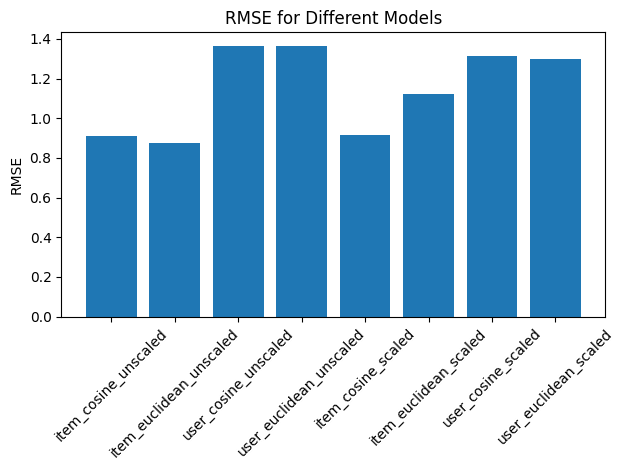

In [19]:
import matplotlib.pyplot as plt

labels = [
    'item_cosine_unscaled',
    'item_euclidean_unscaled',
    'user_cosine_unscaled',
    'user_euclidean_unscaled',
    'item_cosine_scaled',
    'item_euclidean_scaled',
    'user_cosine_scaled',
    'user_euclidean_scaled'
]

rmses = [
    item_cosine_unscaled_rmse,
    item_euclidean_unscaled_rmse,
    user_cosine_unscaled_rmse,
    user_euclidean_unscaled_rmse,
    item_cosine_scaled_rmse,
    item_euclidean_scaled_rmse,
    user_cosine_scaled_rmse,
    user_euclidean_scaled_rmse
]

maes = [
    item_cosine_unscaled_mae,
    item_euclidean_unscaled_mae,
    user_cosine_unscaled_mae,
    user_euclidean_unscaled_mae,
    item_cosine_scaled_mae,
    item_euclidean_scaled_mae,
    user_cosine_scaled_mae,
    user_euclidean_scaled_mae
]

times = [
    item_cosine_unscaled_time,
    item_euclidean_unscaled_time,
    user_cosine_unscaled_time,
    user_euclidean_unscaled_time,
    item_cosine_scaled_time,
    item_euclidean_scaled_time,
    user_cosine_scaled_time,
    user_euclidean_scaled_time
]

memories = [
    item_cosine_unscaled_memory,
    item_euclidean_unscaled_memory,
    user_cosine_unscaled_memory,
    1-user_euclidean_unscaled_memory,
    item_cosine_scaled_memory,
    item_euclidean_scaled_memory,
    user_cosine_scaled_memory,
    user_euclidean_scaled_memory
]


plt.figure()
plt.bar(labels, rmses)
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

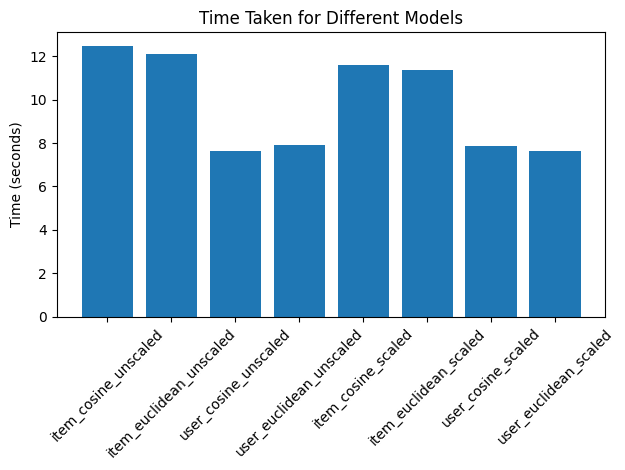

In [23]:

plt.figure()
plt.bar(labels, times)
plt.ylabel('Time (seconds)')
plt.title('Time Taken for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

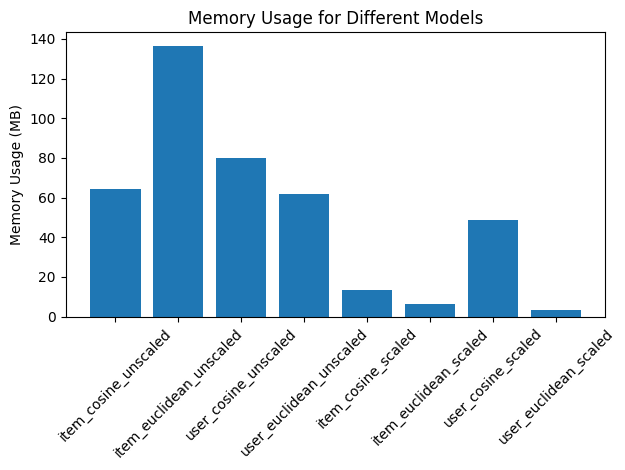

In [20]:

plt.figure()
plt.bar(labels, memories)
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

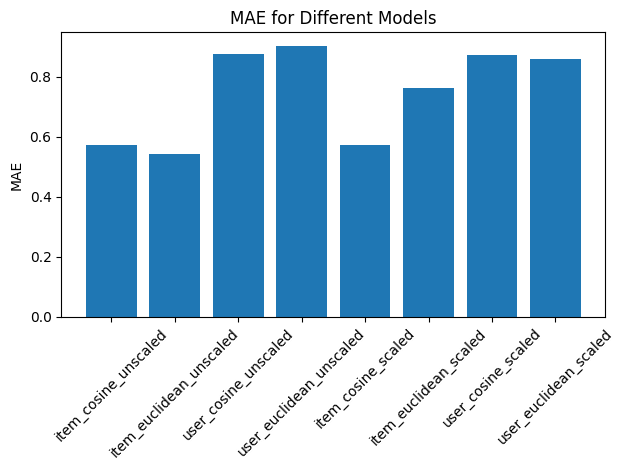

In [22]:
plt.figure()
plt.bar(labels, maes)
plt.ylabel('MAE')
plt.title('MAE for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
!streamlit run src/deploy_streamlit.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.16.30.1:8501

2025-04-14 13:21:55.606 Uncaught app exception
Traceback (most recent call last):
  File "/Users/dhruvgandhi/anaconda3/envs/class_files/lib/python3.8/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/Users/dhruvgandhi/anaconda3/envs/class_files/lib/python3.8/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/Users/dhruvgandhi/Documents/DS 4420/FinalProject/src/deploy_streamlit.py", line 2, in <module>
    from collaborative_filtering import *
  File "/Users/dhruvgandhi/Documents/DS 4420/FinalProject/src/collaborative_filtering.py", line 5, in <module>
    from src.obtain_data import *
ModuleNotFoundError: No module named 'src'
2025-04-14 13:22:03.570 Please replace `st.experimental_get_query_params